<h1>Bank Note Analysis

<h2>Can we classify banknote as fake or genuine?

In [4]:
from pyforest import*

In [5]:
lazy_imports()

['from sklearn.preprocessing import StandardScaler',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import skimage',
 'import sklearn',
 'import gensim',
 'from sklearn.impute import SimpleImputer',
 'import bokeh',
 'from xlrd import open_workbook',
 'from pathlib import Path',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.decomposition import PCA',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import Lasso',
 'import glob',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import cross_val_score',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import plotly as py',
 'import lightgbm as lgb',
 'import nltk',
 'import cv2',
 'import plotly.graph_objs as go',
 'from sklearn import metrics',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from pyspark import SparkContext',
 'import dash',
 'from sklearn.ensemble import RandomForestRegres

In [6]:
df=pd.read_csv('BankNote_Authentication.csv')

<IPython.core.display.Javascript object>

In [7]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.shape

(1372, 5)

In [9]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [10]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [11]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

<h3>Visualizations

<h4>Univariate Data Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of "Class" Attribute'}, xlabel='class', ylabel='Density'>

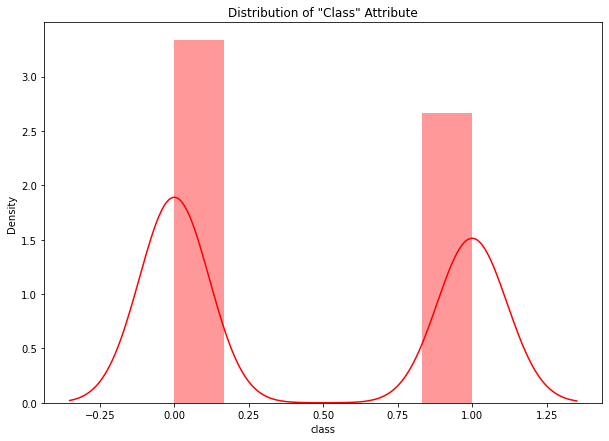

In [12]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['class'],color='red')

<h4>Multivariate Data Analysis

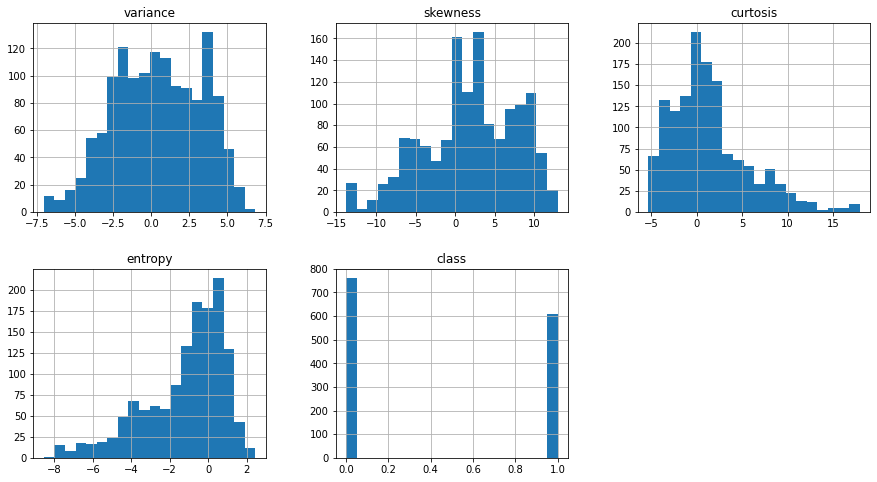

In [14]:
df.hist(bins=20, figsize=(15,8),layout=(2,3)); #Histogram of all the attributes

In [17]:
import warnings

warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

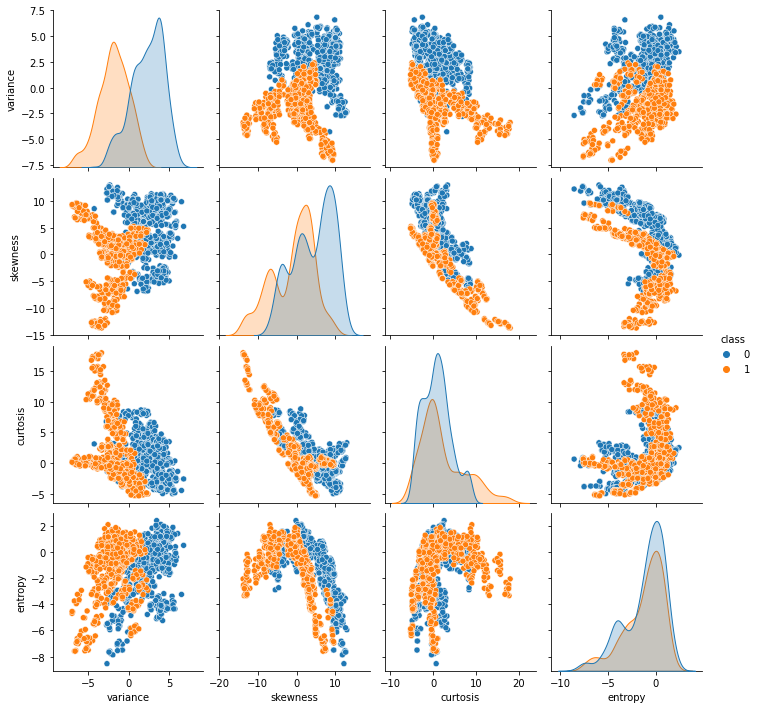

In [18]:
sns.pairplot(df, hue="class")

<h3>Preparing Our Data To Build Our Model

In [20]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
#defining features and target variable
X = df.drop(['class'],axis=1) 
y = df['class']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

<h4>Scaling Our Data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [28]:
y_train.head()

1226    1
1085    1
148     0
1178    1
478     0
Name: class, dtype: int64

<h4>Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

classifier=LogisticRegression(solver='liblinear',random_state=1)
classifier.fit(X_train,y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10) # CV: Determines the cross-validation splitting strategy (How many folds, default is 5-folds) Evaluate a score by cross-validation. estimator: object to use to fit the data.
print("Accuracies:\n",accuracies)

y_test_pred=classifier.predict(X_test)


print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9835863219349459


In [31]:
accuracy_score(y_test,y_test_pred)

0.9745454545454545

Confusion Matrix For Logistic Regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

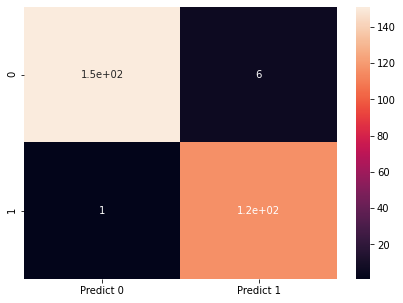

In [32]:
from sklearn import metrics

print("Confusion Matrix For Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h4>Support Vector Machine

In [35]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [36]:
svm_pred=svm_classifier.predict(X_test)

print("Mean Accuracy: ",svm_accuracies.mean())

Mean Accuracy:  0.9854045037531277


In [37]:
accuracy_score(y_test,svm_pred)

0.9818181818181818

Confusion Matrix For svm_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

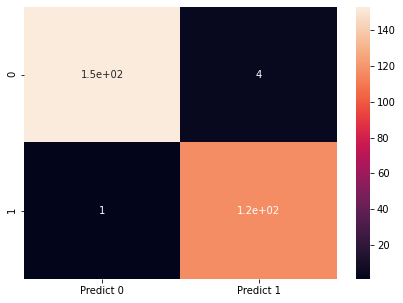

In [38]:
print("Confusion Matrix For svm_pred")
cm=metrics.confusion_matrix(y_test,svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h4>Support Vector Machine (rbf)

In [39]:
from sklearn.svm import SVC

svm_rbf_classifier=SVC(kernel='rbf',gamma='auto')
svm_rbf_classifier.fit(X_train,y_train)

svm_rbf_accuracies=cross_val_score(estimator=svm_rbf_classifier,X=X_test,y=y_test,cv=10)
print("Accuracies:\n",svm_rbf_accuracies)
print("Mean Accuracy: ",svm_rbf_accuracies.mean())

Accuracies:
 [1.         0.96428571 1.         1.         1.         1.
 0.96296296 1.         1.         1.        ]
Mean Accuracy:  0.9927248677248677


In [40]:
svm_rbf_pred=svm_rbf_classifier.predict(X_test)

accuracy_score(y_test,svm_rbf_pred)

1.0

Confusion Matrix For svm_rbf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

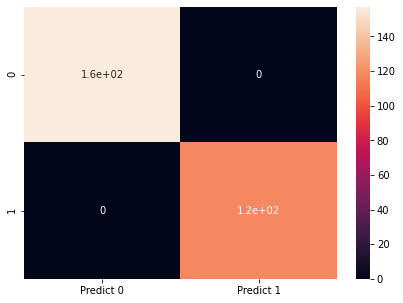

In [41]:
print("Confusion Matrix For svm_rbf")
cm=metrics.confusion_matrix(y_test,svm_rbf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h4>RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rdf_classifier.fit(X_train,y_train)
rdf_accuracies=cross_val_score(estimator=rdf_classifier,X=X_test,y=y_test,cv=10)
 
print("Accuracies:\n",rdf_accuracies)
print("Mean Accuracy: ",rdf_accuracies.mean())

Accuracies:
 [0.96428571 1.         0.89285714 0.96428571 1.         0.96296296
 1.         0.96296296 1.         1.        ]
Mean Accuracy:  0.9747354497354497


In [43]:
rdf_pred=rdf_classifier.predict(X_test)

accuracy_score(y_test,rdf_pred)

0.9963636363636363

Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

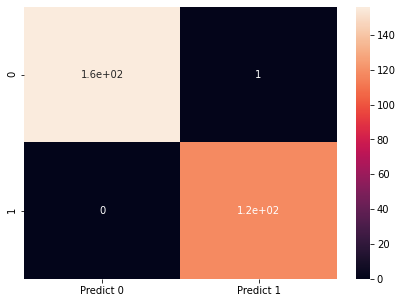

In [44]:
print("Confusion Matrix For Random Forest")
cm=metrics.confusion_matrix(y_test,rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h4>KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [47]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [48]:
final_KNN_Model = grid.best_estimator_

In [50]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [51]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [52]:
KNN_predicted = KNN.predict(X_test)

accuracy_score(y_test,KNN_predicted)

1.0

Confusion Matrix For KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

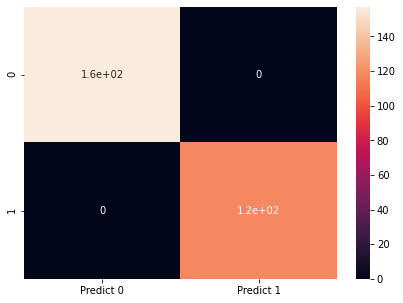

In [53]:
print("Confusion Matrix For KNN")
cm=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h4>Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
multi_classifier.fit(X_train,y_train)
multi_accuracies=cross_val_score(estimator=multi_classifier,X=X_test,y=y_test,cv=10)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

In [56]:
print("Accuracies:\n",multi_accuracies)
print("Mean Accuracy: ",multi_accuracies.mean())

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy:  1.0


In [58]:
multi_predicted= multi_classifier.predict(X_test)

In [59]:
accuracy_score(y_test,multi_predicted)

1.0

Confusion Matrix For MLPClassifier


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

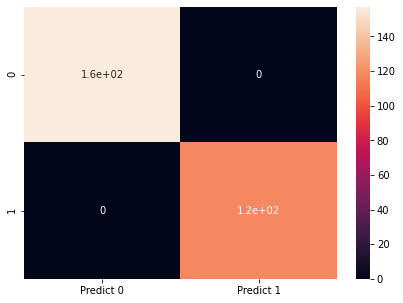

In [61]:
print("Confusion Matrix For MLPClassifier")
cm=metrics.confusion_matrix(y_test,multi_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h4>Printing each Algorithm and the accuracy score

In [63]:
print("LogisticRegression:", accuracy_score(y_test,y_test_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test,svm_pred))
print("Support Vector Machine (using kernel=rbf):", accuracy_score(y_test,svm_rbf_pred))
print("RandomForestClassifier:", accuracy_score(y_test,rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test,KNN_predicted))
print("MLPClassifier:", accuracy_score(y_test,multi_predicted))

LogisticRegression: 0.9745454545454545
Support Vector Machine (using kernel=linear): 0.9818181818181818
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9963636363636363
KNeighborsClassifier: 1.0
MLPClassifier: 1.0
